In [4]:
!pip install datasets


In [5]:
# Task 3: Heart Disease Prediction (Hugging Face Dataset)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

In [6]:


# Load dataset from Hugging Face
dataset = load_dataset("mstz/heart_failure")
df = pd.DataFrame(dataset["train"])

# Rename target column for clarity
df.rename(columns={"DEATH_EVENT": "target"}, inplace=True)

# Check data
df.info()
df.head()



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/299 [00:00<?, ? examples/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   age                                              299 non-null    int64  
 1   has_anaemia                                      299 non-null    bool   
 2   creatinine_phosphokinase_concentration_in_blood  299 non-null    float64
 3   has_diabetes                                     299 non-null    bool   
 4   heart_ejection_fraction                          299 non-null    float64
 5   has_high_blood_pressure                          299 non-null    bool   
 6   platelets_concentration_in_blood                 299 non-null    float64
 7   serum_creatinine_concentration_in_blood          299 non-null    float64
 8   serum_sodium_concentration_in_blood              299 non-null    float64
 9   is_male                         

,age,has_anaemia,creatinine_phosphokinase_concentration_in_blood,has_diabetes,heart_ejection_fraction,has_high_blood_pressure,platelets_concentration_in_blood,serum_creatinine_concentration_in_blood,serum_sodium_concentration_in_blood,is_male,is_smoker,days_in_study,is_dead
0,75,False,582.0,False,20.0,True,265000.00,1.9,130.0,True,False,4,1
1,55,False,7861.0,False,38.0,False,263358.03,1.1,136.0,True,False,6,1
2,65,False,146.0,False,20.0,False,162000.00,1.3,129.0,True,True,7,1
3,50,True,111.0,False,20.0,False,210000.00,1.9,137.0,True,False,7,1
4,65,True,160.0,True,20.0,False,327000.00,2.7,116.0,False,False,8,1


In [8]:
df.columns


Index(['age', 'has_anaemia', 'creatinine_phosphokinase_concentration_in_blood',
       'has_diabetes', 'heart_ejection_fraction', 'has_high_blood_pressure',
       'platelets_concentration_in_blood',
       'serum_creatinine_concentration_in_blood',
       'serum_sodium_concentration_in_blood', 'is_male', 'is_smoker',
       'days_in_study', 'is_dead'],
      dtype='object')

In [9]:
# Features and target
X = df.drop("is_dead", axis=1)
y = df["is_dead"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.7833333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


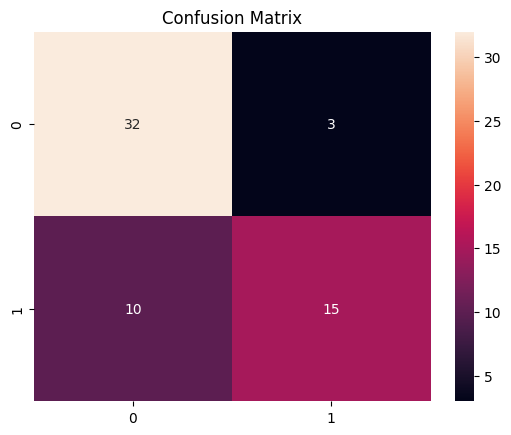

In [10]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()



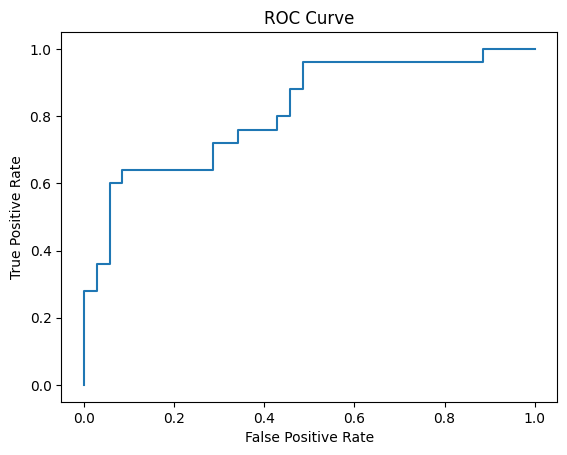

In [11]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
